# The Julia set

Tech 411.05 *Patterns and Symmetry*, University of New Hampshire, J. Gibson, 2024-11-07

How does this pattern...

![imag](julia-set.png) 

...emerge from this equation?

\begin{align*}
  f(z) = z^2 + c
\end{align*}

## Plot outline of Julia set

First let's make a simpler plot of the Julia set, an just an outline of its shape. 

The code here isn't important right now. We just need the plot.

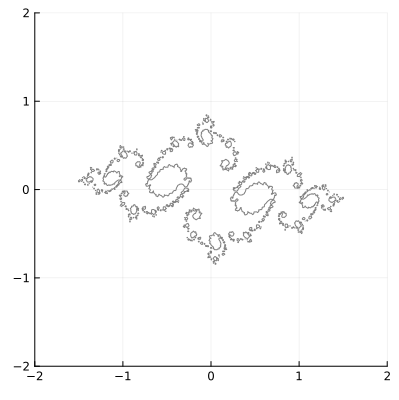

In [1]:
# parameters to define f(z) = z^2 + c and the plot
α = 2.9
c = 0.7885*exp(α*im)
R = (1+sqrt(1+4abs(c)))/2  

f(z) = z^2 + c

# parameters for making escape-time plot
nmax = 64    # maximum number of iterations for escape-time computation
Nreal = 512  # number of pixels, real axis
Nimag = 512

bound = 2
wd = bound    # width of plot, real axis
ht = bound    # height of plot, imag axis

# define a grid of points along real and imaginary axes 
realgrid = range(-wd, wd, Nreal)
imaggrid = range(-ht, ht, Nimag)

"""
compute the escape time of point z₀ under iteration zₙ₊₁ = f(zₙ)
"""
function escapetime(f, z₀, nmax, R) 
    z = z₀
    for n in 0:nmax-1
        if abs(z) > R
            return n + 1 - log(log(abs(z))/log(R)) # this smooths the color plots, compared to returning just n
        end      
        z = f(z)
    end
    return nmax
end

# compute escape time over grid z = a + bi
escape = [escapetime(f, a+b*im, nmax, R) for b in imaggrid, a in realgrid]

# plot escape time as contour over z
using Plots
contour(realgrid, imaggrid, escape, levels = 1, size=(400,400), colorbar=:none, color=:gray, aspect_ratio=1)
juliacontour = plot!(xlim=(-wd, wd), ylim=(-ht,ht))

## Julia set dynamics

The dynamics of the Julia set comes from iterating a map $z \rightarrow f(z)$. 
That is, we start with some initial value $z_0$, and we iterate the map as follows

\begin{align*}
 z_1 &= f(z_0) \\
 z_2 &= f(z_1) \\
 z_3 &= f(z_2) \\
 &\vdots \\
 z_{n+1} &= f(z_n)
 \end{align*}
 
This produces a sequence of complex numbers $z_0, z_1, z_2, \ldots, z_n$. 

Some nomenclature
  * the function $f$ is the **dynamics**,
  * the variable $z$ is the **state**, and $z_n$ is the state at time $n$,
  * the starting value $z_0$ is the **initial condition**, and 
  * the sequence $z_0, z_1, z_2, \ldots$ is a **trajectory**.

These names reflect the physics origins of dynamical systems theory.
The dynamics $f$ are the physics equations that govern the evolution of
some physics variables, like planets orbiting around the sun. 

The Julia set dynamics is a discrete-time dynamical system on a single complex
variable $z$, with iterated dynamics $z_{n+1} = f(z_n)$ for  $f(z) = z^2 + c$
where $c$ is some complex constant. 

### Compute a trajectory

Let's compute trajectories for a few values of $z$.

In [2]:
"""
trajectory(f, z₀; N=64)

  Compute z[1], z[2], ... z[N] where z[n+1] = f(z[n]) 
"""
function trajectory(f, z₀, N=64)
    z = zeros(ComplexF64, N) # allocate array to store z1, z2, z3, ...
    z[1] = z₀
    for n in 1:N-1
        z[n+1] = f(z[n])
    end
    z
end

trajectory

In [3]:
# parameters to define f(z) = z^2 + c 
α = 2.9
c = 0.7885*exp(α*im) # for cool plots and interesting trajectories
#c = 0               # to show illustrate iterated dynamics for the simpler case f(z) = z^2

f(z) = z^2 + c

z₀ = 0.5  # initial condition
z = trajectory(f, z₀, 50)

50-element Vector{ComplexF64}:
                    0.5 + 0.0im
    -0.5156005132204521 + 0.18864809608522515im
    -0.5353447281438388 - 0.005886014233981329im
     -0.479041180432614 + 0.19495018946510814im
    -0.5741256370426614 + 0.001869758311370845im
    -0.4359837621069533 + 0.18650114372196194im
    -0.6103013490091196 + 0.02602515553092402im
   -0.39381008533850964 + 0.15688172102783499im
    -0.6351260042987833 + 0.06508488819317723im
    -0.3664515145550324 + 0.10597388612849372im
      -0.64254426524195 + 0.11097951393508702im
   -0.36505383293840293 + 0.046029595608566676im
    -0.6344549359493209 + 0.15504153547420124im
                        ⋮
    -0.5986122275294776 - 0.36152745216172755im
    -0.5379660129391992 + 0.6214776029884019im
    -0.8624274931589632 - 0.48001956033613713im
    -0.2522381105692971 + 1.0166122282611498im
    -1.7354768714469833 - 0.3242085991912458im
      2.141168242317407 + 1.3139611469264896im
      2.092507033055786 + 5.815471854961136im
  

In [4]:
"""
animatetrajectory(f, z₀; N=64, speed=8, bound=2, Rstop=true

    Show an animation of z[n+1] = f(z[n]) for n=1,...,N
"""
function animatetrajectory(f, z₀, N=64; speed=8, bound=2, Rstop=true)

    z = trajectory(f, z₀, N)
    c = f(0)
    R = (1+sqrt(1+4abs(c)))/2
    θ = range(0,2π, 100)
    C = [R*cos.(θ) R*sin.(θ)]
    
    for n in 1:N
        title = abs(z[n]) > R && Rstop ? "escape time n=$n" : "n=$n"
        plot(juliacontour)
        scatter!([z[1]], color=:red, label="z₀", markersize=4)
        scatter!(z[2:n-1], aspect_ratio=1, label="z₁, z₂, ...", title=title, color=:blue, markersize=2)
        scatter!([z[n]], aspect_ratio=1, label="zₙ", title=title, color=:green, markersize=4)
        plot!(xlim=(-bound,bound), ylim=(-bound,bound), aspect_ratio=1, label="", title=title)  
        plot!(C[:,1], C[:,2], color=:gray, label="", xlabel="Re z", ylabel="Im z")
        p = plot!()
    
        IJulia.clear_output(true)
        display(p)
        sleep(1/speed)
    
        if abs(z[n]) > (Rstop ? R : bound)
            break
        end
    end
end

animatetrajectory

Can show that once $z_n$ goes outside a circle of radius $R = (1+\sqrt{1+4|c|})/2$,
it's guaranteed to shoot off to infinity. So we draw the circle on trajectory plots
and define the *escape time* to be the first value of $n$ for which $|z| > R$. 

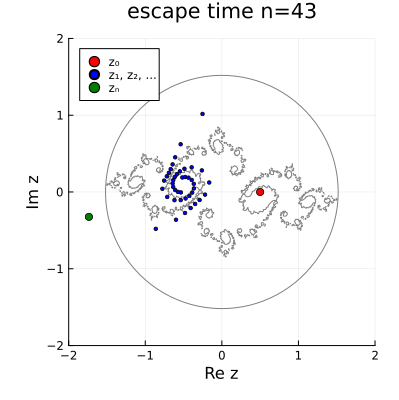

In [5]:
z₀ = 0.5
animatetrajectory(f, z₀, 50, speed = 8, bound = 2, Rstop=true);

Here's another function that just shows the final frame of an animation like the above.

In [6]:
"""
plottrajectory(f, z₀, N=64, bound=2)

    Show z[n+1] = f(z[n]) as a scatter plot
"""
function plottrajectory(f, z₀, N=64, bound=2)
    
    z = trajectory(f, z₀, N)
    c = f(0)
    R = (1+sqrt(1+4abs(c)))/2
    θ = range(0,2π, 100)
    C = [R*cos.(θ) R*sin.(θ)]

    escapetime = 0
    for n in 1:N
        if abs(z[n]) > R
            escapetime = n
            break
        end
    end
    
    title = escapetime > 0 ? "escape time = $escapetime" : "n=$N"
    plot(juliacontour)
    scatter!([z[1]], color=:red, label="z₀", markersize=4)
    scatter!(z[2:end-1], aspect_ratio=1, label="z₁, z₂, ...", title=title, color=:blue, markersize=2)
    scatter!([z[end]], aspect_ratio=1, label="zₙ", title=title, color=:green, markersize=4)
    plot!(C[:,1], C[:,2], color=:gray, label="", xlabel="Re z", ylabel="Im z")
    plot!(xlim=(-2,2), ylim=(-2,2), aspect_ratio=1, label="", title=title)
end


plottrajectory

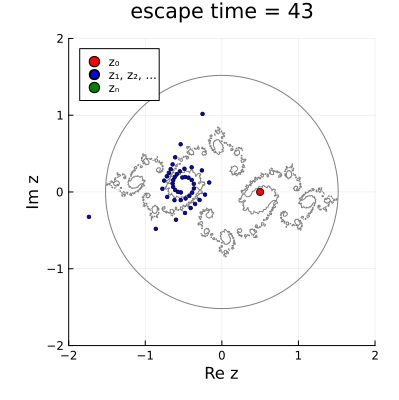

In [7]:
plottrajectory(f, 0.5)

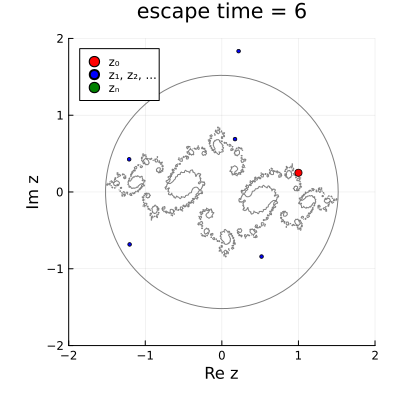

In [8]:
plottrajectory(f, 1+0.25im)

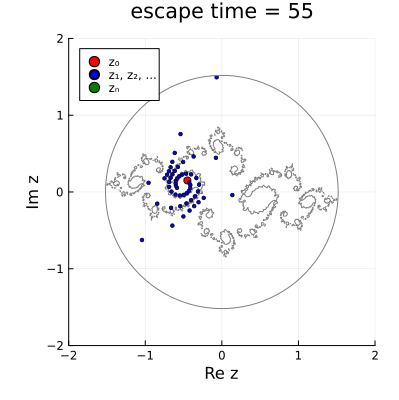

In [9]:
fig1 = plottrajectory(f, -0.45+ 0.15im)

## Visualizing the Julia set

The Julia set is defined as all the points $z$ in the complex plane whose trajectories
remain bounded for all time. To visualize the Julia set, we sweep over a region of the
complex plane, for every point $z$ computing the trajectory $z_n = f^n(z)$ and the escape
time. We color-code the complex plane according to the escape time. 

We have to stop the computation of the trajectory after some finite number of steps (call
that value $n_{max}$). If the trajectory hasn't left the circle by $n=n_{max}$, we assign it
an escape time of $n_{max}$. We take those points to be within the Julia set, at least 
approximately. Then the portion of the complex plane with the color coding of $n_{max}$ will
approximate the Julia set.

The other colors will form a kind of aura around the Julia set. 

In [10]:
"""
 escapetime(f, z₀, nmax, R) : compute the escape time of point z₀ under iteration zₙ₊₁ = f(zₙ)
"""
function escapetime(f, z₀, nmax, R) 
    z = z₀
    for n in 0:nmax-1
        if abs(z) > R
            return n + 1 - log(log(abs(z))/log(R)) # this smooths the color plots, compared to returning just n
        end      
        z = f(z)
    end
    return nmax
end

escapetime

Make a colorplot of the Julia set from the escape time as a function
of initial value $z$, sweeping $z$ over the complex plane. 

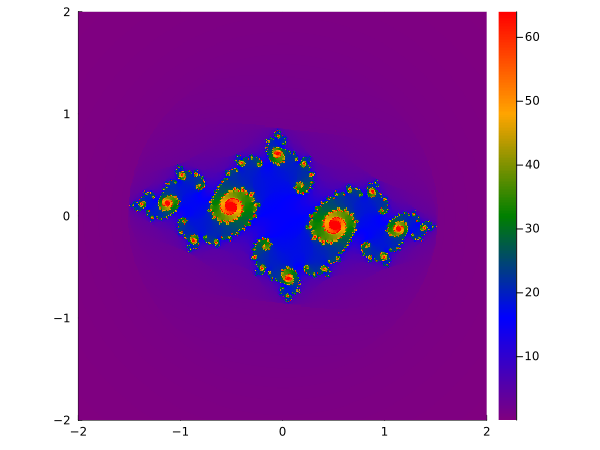

In [11]:
# Make a colorplot of the Julia set from the escape time as a function
# of initial value $z$.

# parameters to define f(z) = z^2 + c and to 
α = 2.9
c = 0.7885*exp(α*im)
R = (1+sqrt(1+4abs(c)))/2  # radius after which escape is guaranteed

f(z) = z^2 + c

# parameters for making escape-time plot
nmax = 64    # maximum number of iterations for escape-time computation

# define a grid of points along real and imaginary axes 
Nreal = 512  # number of pixels, real axis
Nimag = 384
wd = bound        # width of plot, real axis
ht = bound      # height of plot, imag axis

# define a grid of points along real and imaginary axes 
realgrid = range(-wd, wd, Nreal)
imaggrid = range(-ht, ht, Nimag)

R = (1+sqrt(1+4abs(c)))/2  # ensures R^2 - R ≥ c

# compute escape time over grid z = a + bi
escape = [escapetime(f, a+b*im, 64, R) for b in imaggrid, a in realgrid]

# plot escape time as colormap over z
heatmap(realgrid, imaggrid, escape, c=:rainbow, size=(600,450), aspect_ratio=1)
plot!(xlim=(-wd,wd), ylim=(-ht,ht))

In the above plot, places in brightest red have escape time $n_{max}$ 
and so are in our finite approximation to the Julia set. Purple and
points go off to infinity very fast; green and yellow, more slowly.

## Some questions to address

You can see a few curious things in the plot of this Julia set. 
The points within the Julia set, the red regions, seem to be circles
centered on certain points.

**Question 1:** What are the big red centers in the Julia set? Can you
think of an equation involving $z$ and $f(z)$ that would guarantee $f^n(z)$
remains bounded as $n$ goes to infinity? 

**Question 2:** Given an answer to question 3, can you solve that equation
for $z$ and determine the centers of the Julia set?

Also, the whole figure seems to have a kind of up-down, left-right symmetry. 
If you recall the random pattern generator, you might recognize that 
it's a *rotational* symmetry.

**Question 3:** What is this symmetry? 

**Question 4:** Why does the figure have this symmetry?


### Question 1: What are the big red centers in the Julia set? 

#### Partial answer: Equilibria!

One way to ensure a point $z_0$ remains bounded under iterated dynamic $z_{n+1} = f(z_n)$ is if
$f(z_0) = z_0$. 

If that equation holds, then 
\begin{align*}
z_1 &= f(z_0) = z_0 \\
z_2 &= f(z_1) = f(z_0) = z_0 \\
z_3 &= f(z_2) = f(z_0) = z_0 \\
\end{align*}
etc., and we have $z_n = z_0$ for all $n$. 

A state $z$ that satisfies $f(z) = z$ is called an *equilibrium.* 

Equilibria are states that remain constant for all time under the dynamics. Some physics
examples of equilibrium points are a ball nestled at the bottom of a bowl, or a broom balanced
exactly on end. The balance broom is unstable, the nestled ball is stable, but both will stay 
still if unperturbed.



### Question 2: Can we find the equilibria?

#### Answer: Yes! Just solve the equation $f(z) = z$.

Equilibria are solutions of the equation $f(z) = z$. For the Julia set, $f(z) = z^2 + c$
where $c$ is a fixed constant. So we need to solve $z^2 + c = z$, or 

\begin{align*}
z^2 - z + c = 0
\end{align*}

This is a quadratic equation in $z$ whose solutions are given by the quadratic formula

\begin{align*}
z = \frac{1 \pm \sqrt{1 -4c}}{2}
\end{align*}

All we need to do is evaluate this formula for the given value of $c$. Let's do this and overlay
on the outline of the Julia set.

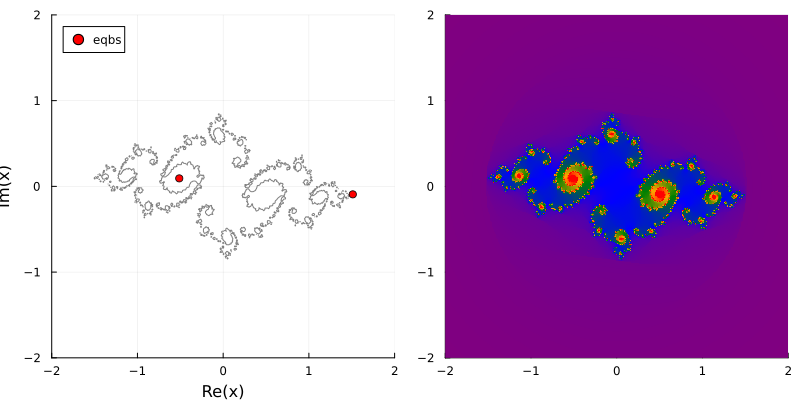

In [12]:
eqbs  = [(1 + sqrt(1 - 4c))/2; (1 - sqrt(1 - 4c))/2]

plot(juliacontour)
fig3 = scatter!(eqbs, label="eqbs", color=:red)

# plot escape time as colormap over z
heatmap(realgrid, imaggrid, escape, c=:rainbow, colorbar=:none, aspect_ratio=1)
juliaset = plot!(xlim=(-bound,bound), ylim=(-bound,bound))

plot(fig3, juliaset, size=(800,400))

Woot! The equilibria are right in the center of a couple high-escape time red areas of the Julia set. 

Another way to find the equilibria are as minima of the function $h(z) = |f(z) - z|$. This function 
will be zero at equilibria, since $f(z)=z$ there, and greater than zero elsewhere. In a contour plot,
the minima will be the centers of concentric circles, like valleys in a topographical map.

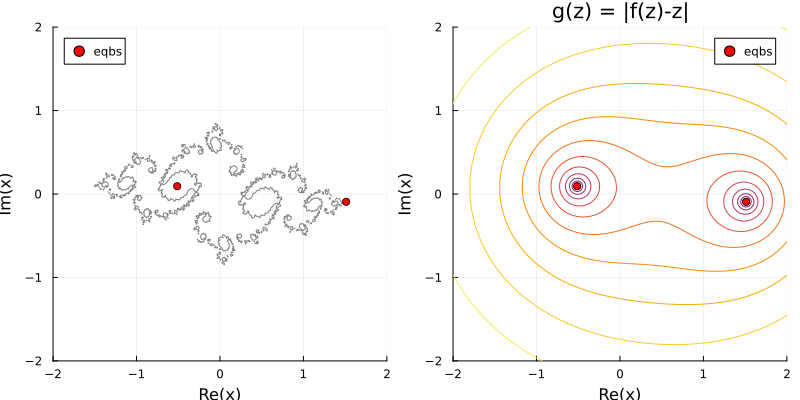

In [13]:
h(z) = abs(f(z) - z)

eqberr = [h(a + b*im) for b in imaggrid, a in realgrid]

contour(realgrid, imaggrid, log10.(eqberr), aspect_ratio=1, xlim=(-wd,wd), ylim=(-ht,ht), label="", colorbar=:none)
fig4 = scatter!(eqbs, label="eqbs", color=:red, title="g(z) = |f(z)-z|")

plot(fig3, fig4, size=(800,400))

In [14]:
trajectory(f, eqbs[1], 4)

4-element Vector{ComplexF64}:
 1.5120704443186246 - 0.09319909357309228im
  1.512070444318625 - 0.09319909357309225im
 1.5120704443186264 - 0.09319909357309225im
 1.5120704443186304 - 0.09319909357309253im

In [15]:
trajectory(f, eqbs[2], 4)

4-element Vector{ComplexF64}:
 -0.5120704443186246 + 0.09319909357309228im
 -0.5120704443186246 + 0.09319909357309228im
 -0.5120704443186246 + 0.09319909357309228im
 -0.5120704443186246 + 0.09319909357309228im

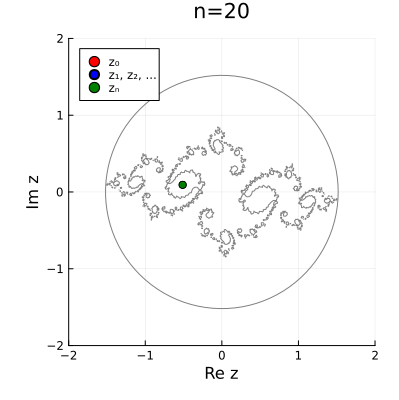

In [16]:
animatetrajectory(f, eqbs[2], 20)

### Question 1 continued: periodic orbits!

Another way to ensure that $z_n$ stays bounded for all $n$ is if it bounces back and forth
between two or more points. For example, suppose we have a point $z_0$ that gets mapped by $f$
into a different point $z_1 = f(z_0)$, but then $f$ maps $z_1$ back into $z_0$, i.e. $z_0 = f(z_1)$. 

If this is true, then the trajectory starting at $z_0$ will be the sequence $z_0, z_1, z_0, z_1$ etc.

Such a trajectory is a called a *periodic orbit*, in this case, a period-2 orbit, since the 
trajectory repeats itself every 2 iterations. 

A period-2 orbit satisfies the equation $z = f(f(z))$, or $z = f^2(z)$. For the Julia dynamics 
function $f(z) = z^2 + c$,  

\begin{align*}
f^2(z) = (z^2 + c)^2 + c,
\end{align*}

and the equation we need to solve is $f^2(z) - z = 0$, or 

\begin{align*}
(z^2 + c)^2 + c - z = 0
\end{align*}

This is a quartic equation in $z$, not as straightforward to solve as the quadratic equation 
for the equilibria. But we can solve it numerically. 

First let's make a plot of $h(z) = |f^2(z) - z|$ to see where any period-2 orbit might be.


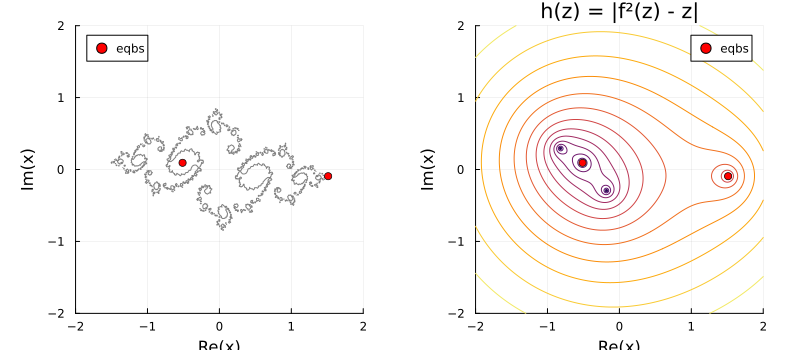

In [17]:
h(z) = abs(f(f(z)) - z)
orberr = [h(a + b*im) for b in imaggrid, a in realgrid]

contour(realgrid, imaggrid, log10.(orberr), label="", colorbar=:none)
plot!(xlim=(-wd,wd), ylim=(-ht,ht), aspect_ratio=1)
fig5 = scatter!(eqbs, label="eqbs", color=:red, title="h(z) = |f²(z) - z|")

plot(fig3,fig5,size=(800,350))

It looks from the contour plot that the minima of $h(z) = |f^2(z) - z|$ are at about
$z = -0.8+0.25i$ and $z = -0.2+0.2i$.

Now we set up a function $g(z) = f^2(z) - z$ and solve $g(z) = 0$ using Newton search.
(If you're interested I can tell you how Newton search works.)

In [18]:
"""
newtonsolve(g, zguess) : find solution of g(z) = 0 from initial guess zguess
"""
function newtonsolve(g, zguess)
    ϵ = 1e-04
    tol = 1e-13
    z = zguess
    for n=1:10
        gz = g(z)
        if abs(gz) < tol
            return z
        end
        Dg = (g(z+ϵ) - gz)/ϵ
        Δz = -g(z)/Dg
        z = z + Δz
    end
end

# set up function g(z) = f²(z) - z$ that is zero when f²(z) = z
g(z) = f(f(z)) - z

g (generic function with 1 method)

In [19]:
# solve g(z) = 0 for z 
orbit2a = newtonsolve(g, -0.8 + 0.25im)

-0.8200723067975214 + 0.2946960609818777im

In [20]:
orbit2b = newtonsolve(g, -0.2 -0.2im)

-0.1799276932024787 - 0.2946960609818789im

In [21]:
trajectory(f, orbit2a, 4 )

4-element Vector{ComplexF64}:
  -0.8200723067975214 + 0.2946960609818777im
  -0.1799276932024786 - 0.2946960609818779im
  -0.8200723067975215 + 0.2946960609818776im
 -0.17992769320247837 - 0.2946960609818778im

Aha! The two points we found are the alternating $z_0$ and $z_1$ points 
of the same periodic orbit.

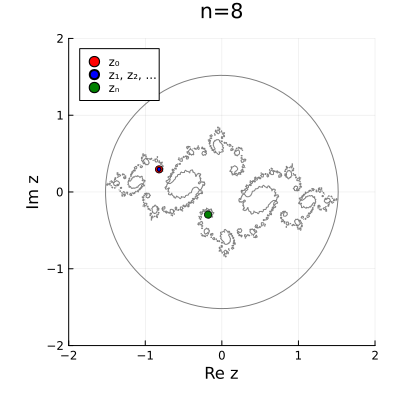

In [22]:
animatetrajectory(f, orbit2a, 8, speed=4)

Woot! We've explained two more of the great red spots in the Julia set!

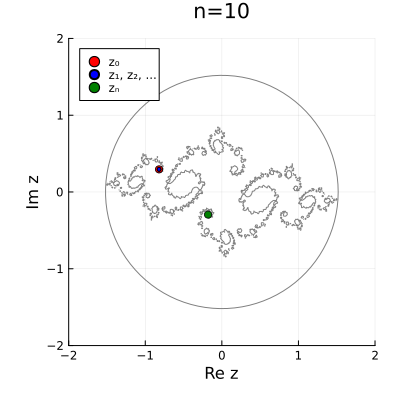

In [23]:
plottrajectory(f, orbit2a, 10)

## What we know so far

Let's plot all the great red spots in the Julia set that we understand.

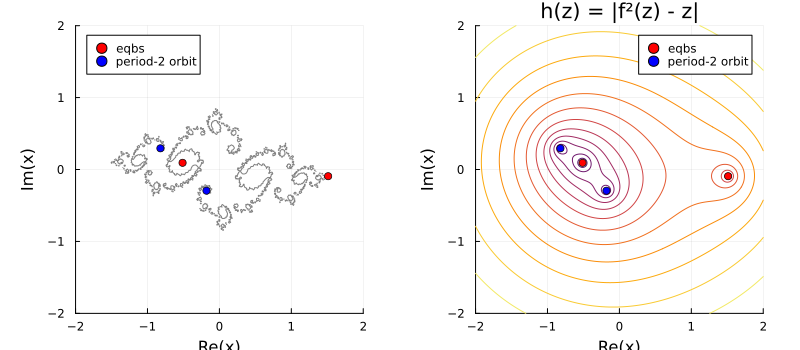

In [24]:
plot(fig3)
fig6 = scatter!([orbit2a; orbit2b], color=:blue, label="period-2 orbit")

plot(fig5)
fig7 = scatter!([orbit2a; orbit2b], color=:blue, label="period-2 orbit")

plot(fig6,fig7,size=(800,350))

## Further questions

There are clearly more great red spots and numerous smaller red spots. What are those?

Here's a hint. The $z$ positions of the equilibria we computed are stored in variable `eqbs`.


In [25]:
eqbs

2-element Vector{ComplexF64}:
  1.5120704443186246 - 0.09319909357309228im
 -0.5120704443186246 + 0.09319909357309228im

Let's compute and plot the values of $\sqrt{z-c}$ for those equilibria.

In [26]:
sqrt.(eqbs.-c)

2-element Vector{ComplexF64}:
 1.5120704443186244 - 0.0931990935730923im
 0.5120704443186245 - 0.0931990935730923im

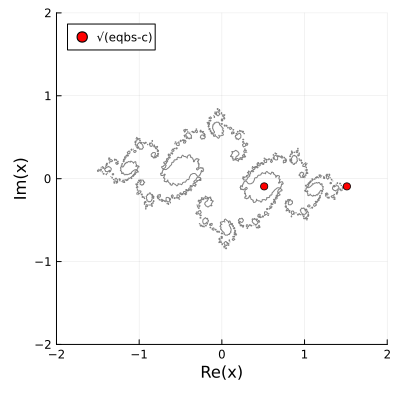

In [27]:
plot(juliacontour)
fig7 = scatter!(sqrt.(eqbs.-c), color=:red, label="√(eqbs-c)")

**Question 5:** Why are the points $\sqrt{z-c}$ at the centers of red spots,
for the $z$ values of the equilibria?

**Question 6:** Given what we've found about the red spots of equilibria, 
periodic orbits, and $\sqrt{z-c}$, can you calculate the positions of any
other red spots?

## Plot $f(z)$ over complex plane

The following is some half-baked code to try to illustrate the image
of a grid under the map $z \rightarrow z^2 + c$.

In [28]:
α = 2.9
c = 0.7885*exp(α*im) # Julia set parameter c

f(z) = z^2 + c       # define iteration function for Julia set

f (generic function with 1 method)

In [29]:
using Plots

# plot a grid of points over z
plot()


grid = [a + b*im for a in -2:0.1:2, b in -2:0.1:2]

function plotgrid!(grid)
    for i in 1:5:size(grid,1)
        plot!(grid[i,:], label="", color=:blue)
    end
    for j in 1:5:size(grid,2)
        plot!(grid[:,j], label="", color=:red)
    end
    plot!(aspect_ratio = 1)
end
function plotgrid(grid)
    plot()
    plotgrid!(grid)
end

plotgrid (generic function with 1 method)

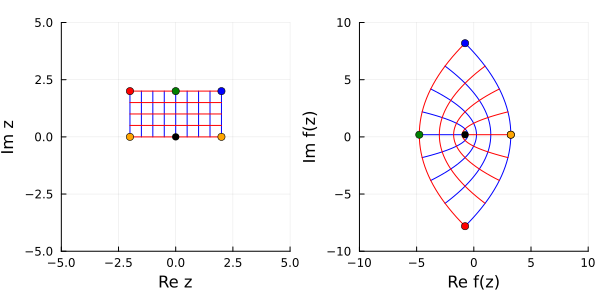

In [30]:
upgrid = [a + b*im for a in -2:0.1:2, b in -0:0.1:2]
upcorners = [2; 2+2im; 2im; -2+2im; -2; 0]
upclrs = [:orange; :blue; :green; :red; :orange; :black]

plotgrid(upgrid)
scatter!(upcorners, label="", color=upclrs)
fig1 = plot!(xlim=(-5,5), ylim=(-5,5), xlabel="Re z", ylabel="Im z")

plotgrid(f.(upgrid))
scatter!(f.(upcorners), label="", color=upclrs)
fig2 = plot!(xlim=(-10,10), ylim=(-10,10), xlabel="Re f(z)", ylabel="Im f(z)")
plot(fig1, fig2, size = (600,300))

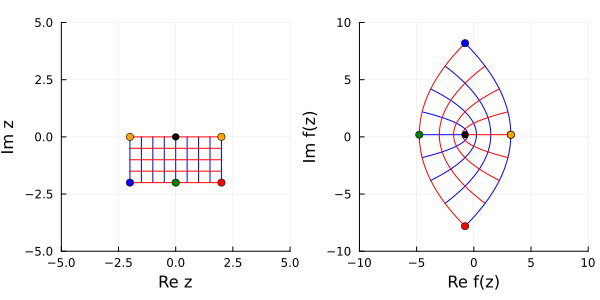

In [31]:
dngrid = [a + b*im for a in -2:0.1:2, b in -2:0.1:0]
dncorners = [2; 0; -2; -2-2im; -2im; 2-2im]
dnclrs = [:orange; :black; :orange; :blue; :green; :red]

plotgrid(dngrid)
scatter!(dncorners, label="", color=dnclrs)
fig1 = plot!(xlim=(-5,5), ylim=(-5,5), xlabel="Re z", ylabel="Im z")

plotgrid(f.(dngrid))
scatter!(f.(dncorners), label="", color=dnclrs)
fig2 = plot!(xlim=(-10,10), ylim=(-10,10), xlabel="Re f(z)", ylabel="Im f(z)")
plot(fig1, fig2, size = (600,300))

c = -0.7656005132204521 + 0.18864809608522515im


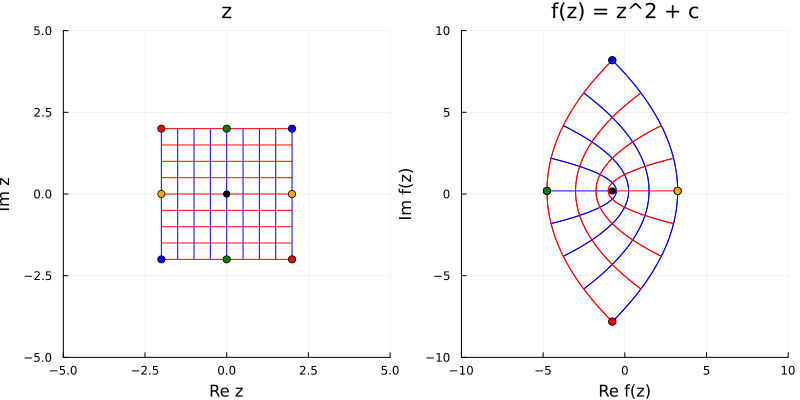

In [32]:
using Plots

# plot a grid of points over z
plot()
line = range(-2,2,9)
for a in line
    z = a .+ collect(-2:0.1:2)*im
    plot!(z, label="", color=:blue)
end
for b in line
    z = collect(-2:0.1:2) .+ b*im
    plot!(z, label="", color=:red)
end
zpts = [2+2im; -2-2im; 2-2im; -2+2im; 2im; -2im; 2; -2; 0]
zclr = [:blue; :blue; :red; :red; :green; :green; :orange; :orange; :black]
scatter!(zpts, label="", color=zclr)
plot!(xlim=(-5,5), ylim=(-5,5), aspect_ratio=1)
fig1 = plot!(title="z", xlabel="Re z", ylabel="Im z")

# plot that same grid mapped through f(z)
plot()
for a in line 
    z = a .+ collect(-2:0.1:2)*im
    plot!(f.(z), label="", color=:blue)
end
for b in line
    z = collect(-2:0.1:2) .+ b*im
    plot!(f.(z), label="", color=:red)
end
scatter!(f.(zpts), label="", color=zclr)
plot!(xlim=(-10,10), ylim=(-10,10), aspect_ratio=1)
fig2 = plot!(title="f(z) = z^2 + c", xlabel="Re f(z)", ylabel="Im f(z)")

@show c

plot(fig1, fig2, size=(800,400))

In [33]:
z0 = roots[2]*(1.1)
z0 = -0.75 + 0im
N = 256
z = fill(z0, N)
for n = 1:N-1
    z[n+1] = f(z[n], c)
end

scatter(z, aspect_ratio=1, xlim=(-w,w), ylim=(-w,w), label="")

LoadError: UndefVarError: `roots` not defined

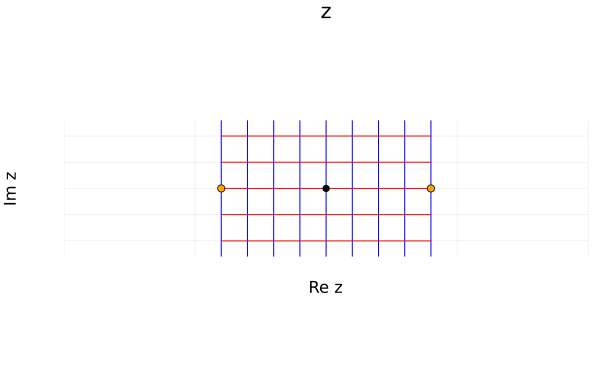

In [34]:
plot(fig1)
plot!(showaxis=:false, colorbar=:none, ylim=(-1.3,1.3), size=(600, 390))

In [35]:
savefig("julia-set.png")

"/home/gibson/professional/teaching/2024-25/patterns-and-symmetry/06-julia-set/julia-set.png"

## Things to try

  * changing $c$ in $f(z) = z^2 + c$
  * changing `nmax`
  * changing the colormap
  * zooming in on a region by changing `realgrid` and `imaggrid`